<a href="https://colab.research.google.com/github/zainab-aamir/Learning_ML/blob/main/Learning_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConcl", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df["class"] = (df["class"]== "g").astype(int)

In [ ]:
df.head()

,fLength,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


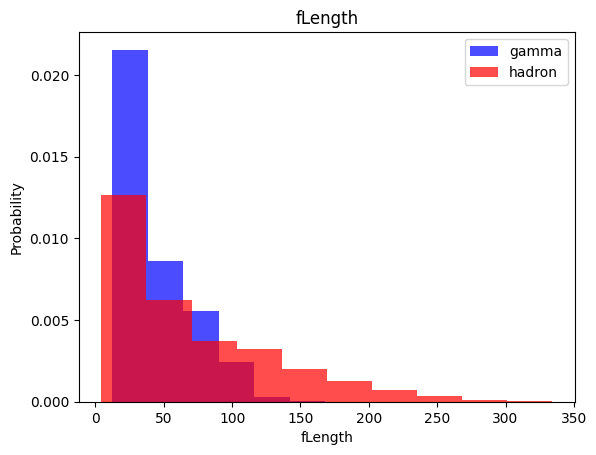

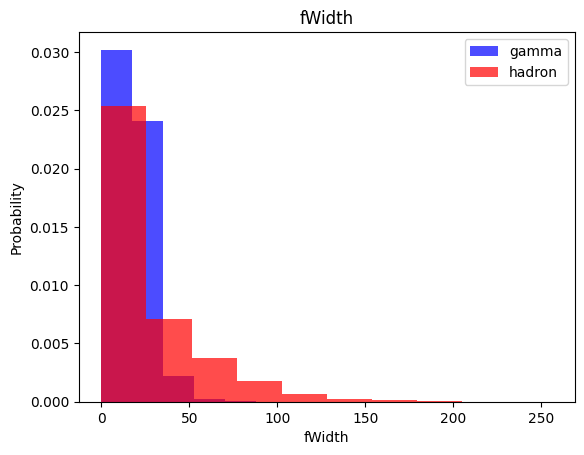

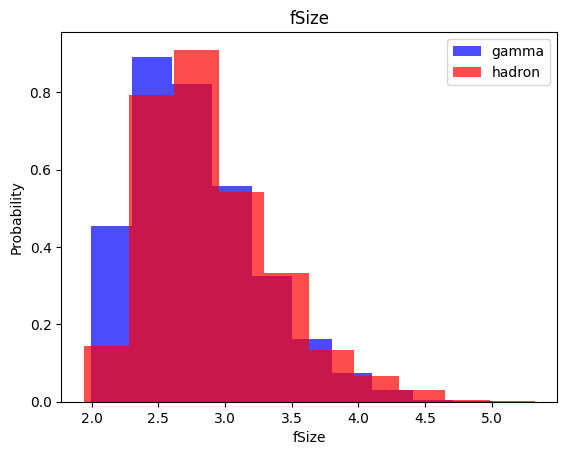

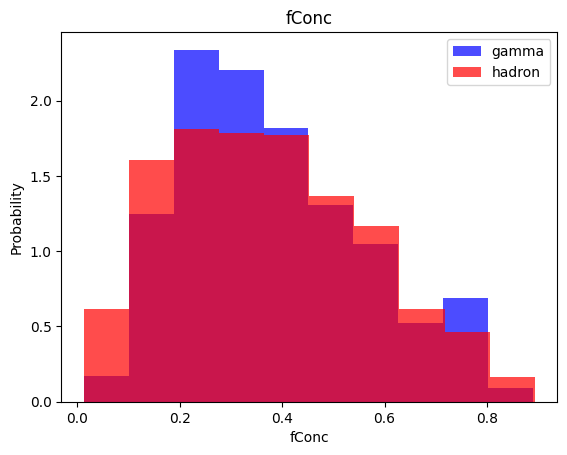

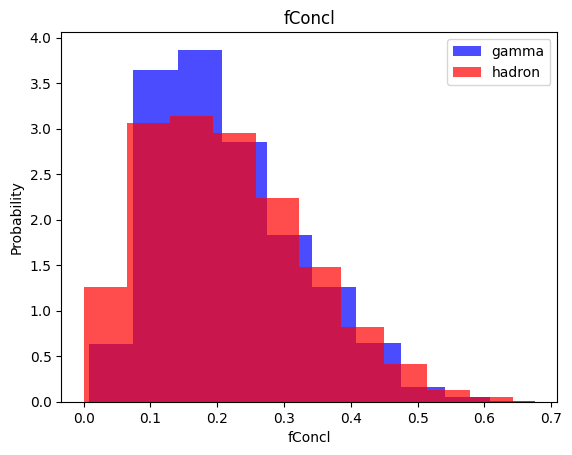

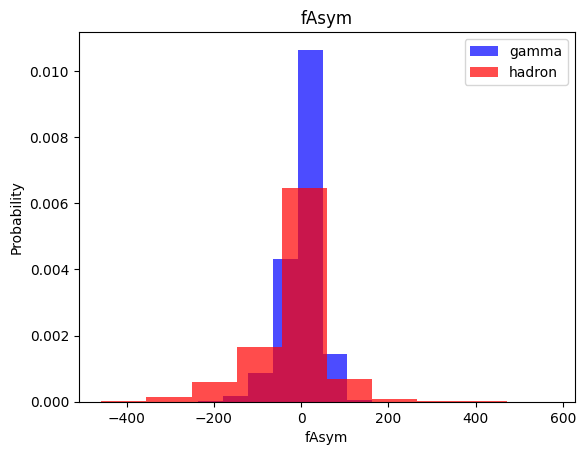

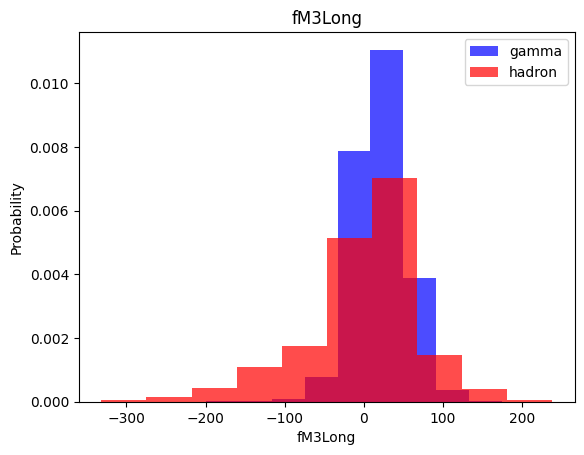

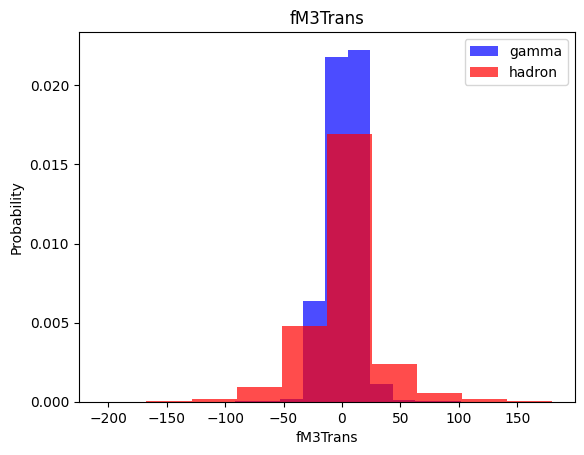

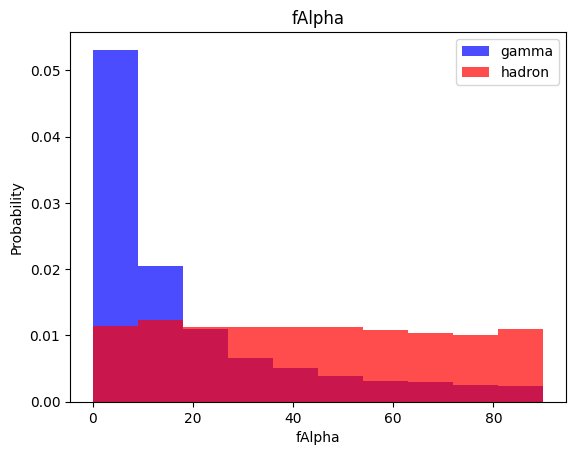

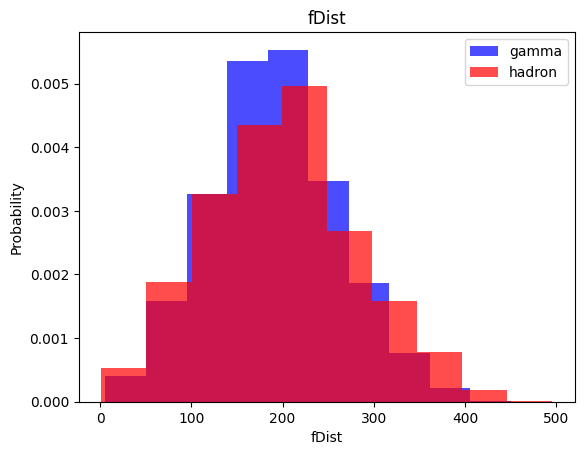

In [ ]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()


#Train, Validation and Test Data Sets

In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

*Scaling the Values (Values are not scaled if values in one column are in 100s and the other columns have values in 0.00s for example)*

In [ ]:
def scale_dataset(dataframe, oversample=False):
  X= dataframe[dataframe.columns[:-1]].values #all the way upto the last column
  Y= dataframe[dataframe.columns[-1]].values # last column

#import standardscaler from sklearn.preprocessing
  scaler = StandardScaler()
  X = scaler.fit_transform(X)

#import randomoversampler from imblearn, set oversample to false by default
  if oversample:
    ros = RandomOverSampler()
    X, Y = ros.fit_resample(X,Y) #Take more of the less class to increase the size of the less class so they match

  data = np.hstack((X, np.reshape(Y, (-1,1)))) #Take two arrays and "horizontally" stack them together #X is 2D and Y is 1D so reshapping (np.reshape) the array.
  return data, X, Y

In [ ]:
#print (len(train[train["class"]==1])) #where the class is gamma
#print (len(train[train["class"]==0])) #hadrons

#we need to match these values

In [ ]:
train, X_train, Y_train = scale_dataset(train, oversample=True)
valid, X_valid, Y_valid = scale_dataset(valid, oversample=False) #validation dataset- oversample false because no need to oversample here
test, X_test, Y_test = scale_dataset(test, oversample=False) #test dataset- oversample false because no need to oversample here


In [ ]:
len(Y_train)

14896

In [ ]:
sum(Y_train == 1)

7448

In [ ]:
sum(Y_train == 0)

7448

kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
Y_pred = knn_model.predict(X_test)

In [ ]:
Y_pred #predictions

array([1, 0, 0, ..., 1, 1, 1])

In [ ]:
Y_test #actual values

array([1, 0, 0, ..., 0, 0, 1])

In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74      1408
           1       0.84      0.86      0.85      2396

    accuracy                           0.81      3804
   macro avg       0.80      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, Y_train)

In [ ]:
Y_pred = nb_model.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.71      0.40      0.51      1408
           1       0.72      0.90      0.80      2396

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.71      0.72      0.69      3804



Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, Y_train)

In [ ]:
Y_pred = lg_model.predict(X_test)
print(classification_report(Y_test, Y_pred)) #slightly better than naive but still not as good as Knn

              precision    recall  f1-score   support

           0       0.70      0.70      0.70      1408
           1       0.82      0.82      0.82      2396

    accuracy                           0.77      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.77      0.77      0.77      3804



Support Vector Machines (SVM)

In [ ]:
from sklearn.svm import SVC

In [ ]:
from sklearn import svm
svm_model = SVC()
svm_model = svm_model.fit(X_train, Y_train)

In [ ]:
Y_pred = svm_model.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1408
           1       0.88      0.91      0.89      2396

    accuracy                           0.86      3804
   macro avg       0.86      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



Neural Net

In [ ]:
import tensorflow as tf


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label ='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel ('Binary crossentropy')
  plt.legend()
  plt.grid(True)
  plt.show()

  def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label ='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch') #Epochs = training cycles
    plt.ylabel ('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
def train_model(X_train, Y_train, num_nodes, dropout_prob, LR, batch_size, epochs):

  nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_nodes, activation='relu', input_shape= (10,)),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(num_nodes, activation = 'relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1, activation = 'sigmoid') #projecting our predictions to 0 or 1
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(LR), loss = 'binary_crossentropy',
                 metrics=['accuracy'])
history = nn_model.fit(
    X_train, Y_train, epochs = epochs, batch_size = batch_size, validation_split= 0.2, verbose = 0
)

return nn_model, history

NameError: ignored

In [ ]:
epochs = 100
for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.1, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        model, history = train_model(X_train, Y_train, num_nodes, dropout_prob, LR, batch_sizze, epochs)
        plot_loss

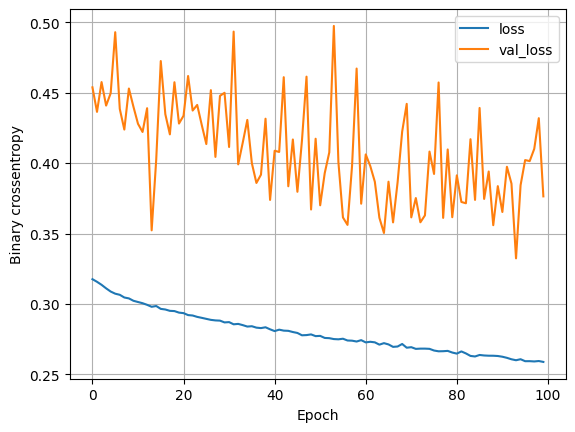

In [ ]:
plot_loss(history)

In [ ]:
plot_accuracy(history)

NameError: ignored